## Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.metrics import classification_report


import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

## Getting The Data

In [2]:
TrainData = pd.read_csv("train.csv")
PredicttData = pd.read_csv("test.csv")

# 1) Data Describe & Visualization

In [3]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
PredicttData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
TrainData.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
PredicttData.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Some Visualization To Describe The Data

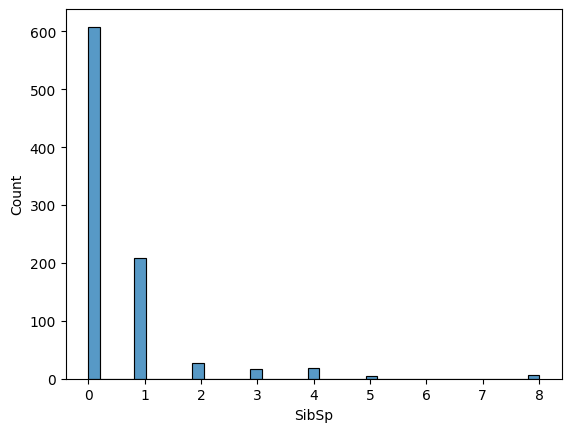

In [7]:
sns.histplot(TrainData['SibSp'])
plt.show()

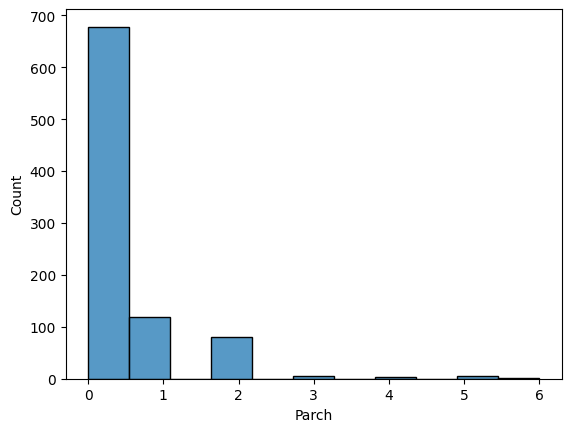

In [8]:
sns.histplot(TrainData['Parch'],kde=False)
plt.show()

**As We See At The Figuers Above We Can See, Most Passengers don't have neither parents nor children aboard.**

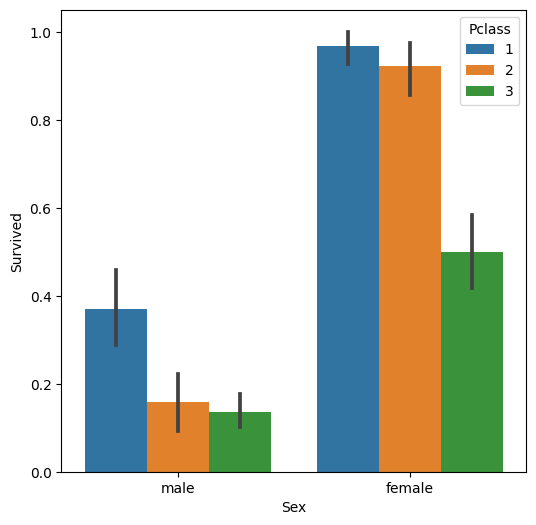

In [9]:
plt.figure(figsize=(6,6))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=TrainData)
plt.show()

# 2- Transformation


## **Drop Unneccary Columns At Data**

In [10]:
TrainData = TrainData.drop(['PassengerId','Name','Ticket','Cabin'], axis=1 )
TrainData.dropna(subset=['Embarked'], inplace=True)

PredicttData = PredicttData.drop(['PassengerId','Name','Ticket','Cabin'], axis=1 )
PredicttData.dropna(subset=['Embarked'], inplace=True)

In [11]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [12]:
PredicttData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [13]:
TrainData.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [14]:
PredicttData.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [15]:
TrainData.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


### **Showing Unnumerical Category Columns And Encoded It To Numerical**

In [16]:
print('Sex => ',TrainData['Sex'].unique())
print('Embarked => ',TrainData['Embarked'].unique())

Sex =>  ['male' 'female']
Embarked =>  ['S' 'C' 'Q']


In [17]:
TrainData['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [18]:
TrainData['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### **Encoding Unnumerical Featuers **[Sex & Embarked]****  

In [19]:
LE =LabelEncoder()

In [20]:
TrainData['Sex'] = LE.fit_transform(TrainData['Sex'])

PredicttData['Sex'] = LE.fit_transform(PredicttData['Sex'])

In [21]:
TrainData['Embarked'] = LE.fit_transform(TrainData['Embarked'])

PredicttData['Embarked'] = LE.fit_transform(PredicttData['Embarked'])

## **Check Nulls Values & Dealing With It**

In [22]:
TrainData.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [23]:
PredicttData.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [24]:
TrainData['Age'].fillna(TrainData['Age'].mean(), inplace=True)

PredicttData['Age'].fillna(PredicttData['Age'].mean(), inplace=True)
PredicttData['Fare'].fillna(PredicttData['Fare'].mean(), inplace=True)

In [25]:
TrainData.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
PredicttData.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## **Detect And Handling Outliears**

## 1) Handling Outliers Using Standard Deviation

#### HistPlot Before Handling Outliers

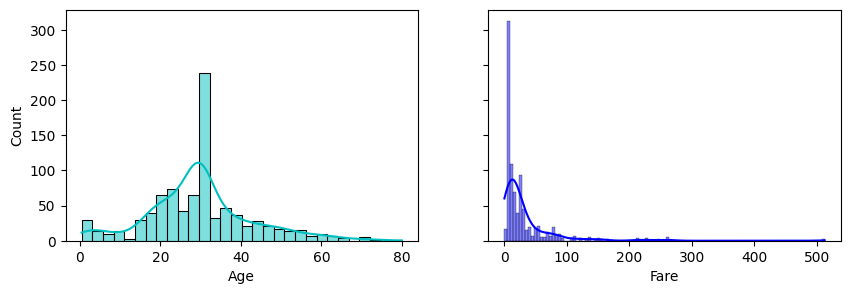

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=False, figsize=(10, 3) )
sns.histplot( TrainData['Age'], kde=True, color='c', ax=ax1)
sns.histplot( TrainData['Fare'], kde=True, color='b', ax=ax2)

plt.show()

##### The Transformation

In [28]:
# Get Columns That Contail Outliers
D_Age = TrainData['Age']
D_Fair = TrainData['Fare']

# Create Rules To Handle Outliers
lower_limitA = D_Age.mean() - 3*D_Age.std()
upper_limitA = D_Age.mean() + 3*D_Age.std()

lower_limitF = D_Fair.mean() - 3*D_Fair.std()
upper_limitF = D_Fair.mean() + 3*D_Fair.std()

In [29]:
#Filter Outliears
D_AgeFiltered=D_Age[(D_Age>lower_limitA)&(D_Age<upper_limitA)]

D_FareFiltered=D_Fair[(D_Fair>lower_limitF)&(D_Fair<upper_limitF)]

#### HistPlot After Handling Outliers

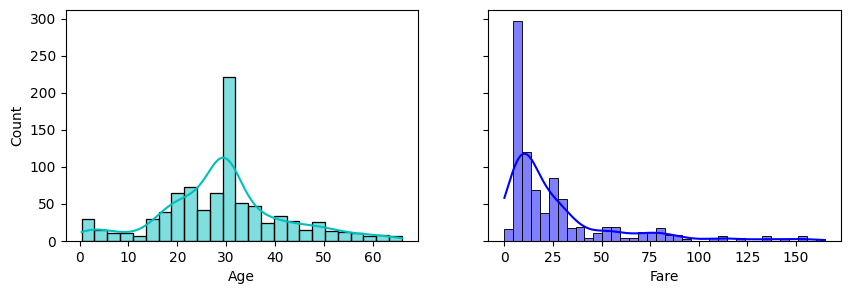

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=False, figsize=(10, 3) )
sns.histplot( D_AgeFiltered, kde=True, color='c', ax=ax1)
sns.histplot( D_FareFiltered, kde=True, color='b', ax=ax2)

plt.show()

## 2) Handling Outliars With IQR

#### BoxPlot Before Handling Outliers

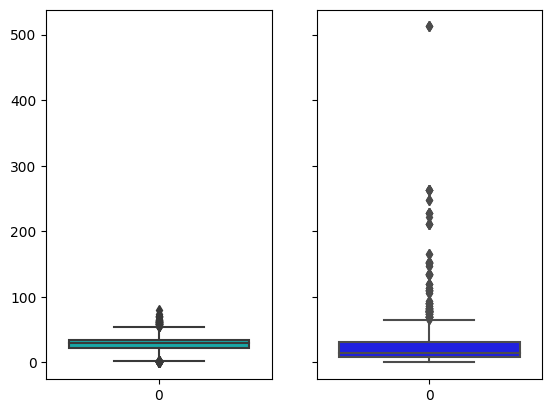

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot( TrainData['Age'], color='c', ax=ax1)
sns.boxplot( TrainData['Fare'], color='b', ax=ax2)

plt.show()

##### The Transformation

In [32]:
# Calculate IQR For Age
QRA   = TrainData['Age'].quantile([0.25, 0.75])
lowerA=QRA[0.25]
upperA=QRA[0.75]
IQRA = QRA[0.75] - QRA[0.25]

lower_limitA = lowerA - 1.5 * IQRA
upper_limitA = upperA + 1.5 * IQRA

# Calculate IQR For Fare
QRF   = TrainData['Fare'].quantile([0.25, 0.75])
lowerF=QRF[0.25]
upperF=QRF[0.75]
IQRF = QRF[0.75] - QRF[0.25]

lower_limitF = lowerF - 1.5 * IQRF
upper_limitF = upperF + 1.5 * IQRF

In [33]:
# Filtered Columns

D_AgeFiltered=D_Age[(D_Age>lower_limitA)&(D_Age<upper_limitA)]

D_FareFiltered=D_Fair[(D_Fair>lower_limitF)&(D_Fair<upper_limitF)]

#### BoxPlot After Handling Outliers

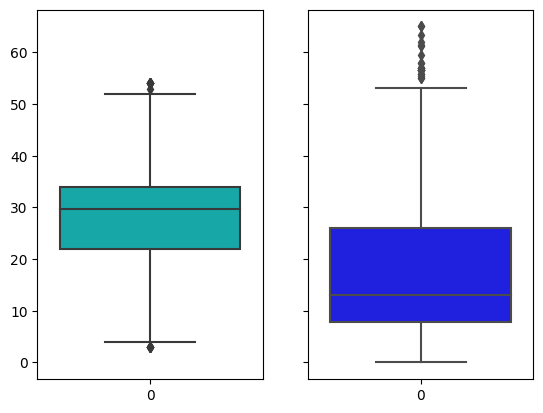

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot( D_AgeFiltered, color='c', ax=ax1)
sns.boxplot( D_FareFiltered, color='b', ax=ax2)

plt.show()

 **Correlation Between Survived And Other Columns**

In [35]:
TrainData.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.074513
Embarked   -0.169718
Pclass     -0.335549
Sex        -0.541585
Name: Survived, dtype: float64

<Axes: >

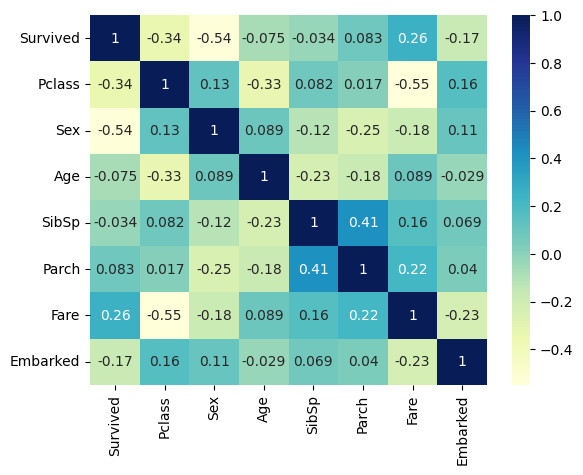

In [36]:
sns.heatmap(TrainData.corr(), cmap="YlGnBu", annot=True)

**As Wee See THe Correlaton Between The Fare And Survied IS A little big**<br> 
**Any Other Specs Is Not Correlated With Survived <br> 
or Not even Correlated by little Correlation <br> 
Except The Parch Column**

# 3- Creation The Models

#### Split Data Into Features And Target And Makes Models Of Predictive

In [37]:
Features = TrainData.drop('Survived', axis=1)
Target = TrainData['Survived']

##### Scaling  The Data With **MinMaxScaler**

In [38]:
Scaler = MinMaxScaler(feature_range=(1,2))

In [39]:
S_Features = Scaler.fit_transform(Features)

Target = Target.values
Target = Target.reshape(-1, 1)
S_Target = Scaler.fit_transform(Target)

S_PredictFeatures = Scaler.fit_transform(PredicttData)

#### Split The Data To Train And Test Models

In [40]:
X_train, X_test, y_train, y_test = train_test_split(S_Features, S_Target, test_size = 0.4, random_state=42)

## 1- Logistic Regression

In [41]:
LR_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train,x_test,y_train,y_test=train_test_split(S_Features, S_Target, test_size=size, shuffle=False)
    
    LRModel=LogisticRegression()

    LRModel.fit(x_train,y_train)

    y_pred=LRModel.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    LR_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test, y_pred)
    LR_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test, y_pred)
    LR_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test, y_pred)
    LR_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

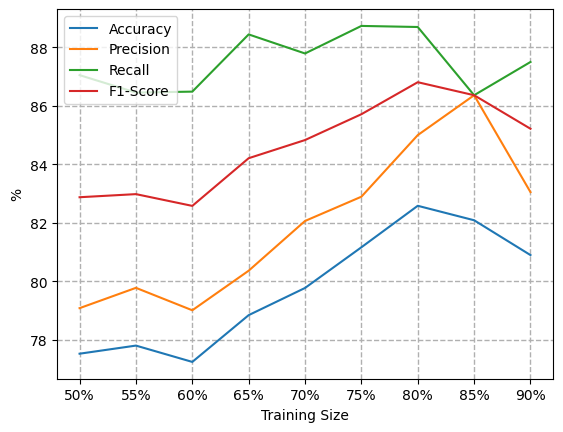

In [42]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , LR_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , LR_matrices['precision'], label="Precision")
plt.plot(training_size , LR_matrices['recall'], label="Recall")
plt.plot(training_size , LR_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

## 2- KNN

In [43]:
KNN_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train1, x_test1, y_train1, y_test1 =train_test_split(S_Features, S_Target, test_size=size, shuffle=False)
    
    KNNModel= KNeighborsClassifier()

    KNNModel.fit(x_train1,y_train1)

    y_pred1 = KNNModel.predict(x_test1)


    accuracy = accuracy_score(y_test1, y_pred1)
    KNN_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test1, y_pred1)
    KNN_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test1, y_pred1)
    KNN_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test1, y_pred1)
    KNN_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

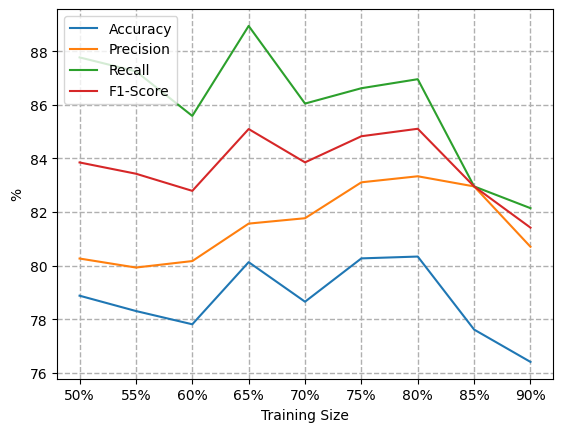

In [44]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , KNN_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , KNN_matrices['precision'], label="Precision")
plt.plot(training_size , KNN_matrices['recall'], label="Recall")
plt.plot(training_size , KNN_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

## 3- SVC

In [45]:
SVC_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train2, x_test2, y_train2, y_test2 =train_test_split(S_Features, S_Target, test_size=size, shuffle=False)
    
    SVCModel = SVC(kernel= 'sigmoid', max_iter=200, C=1,gamma='auto', probability=True)

    SVCModel.fit(x_train2, y_train2)

    y_pred2  = SVCModel.predict(x_test2)


    accuracy = accuracy_score(y_test2, y_pred2)
    SVC_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test2, y_pred2)
    SVC_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test2, y_pred2)
    SVC_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test2, y_pred2)
    SVC_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

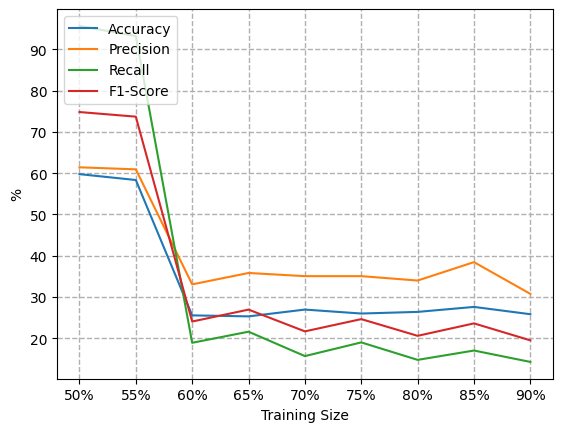

In [46]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , SVC_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , SVC_matrices['precision'], label="Precision")
plt.plot(training_size , SVC_matrices['recall'], label="Recall")
plt.plot(training_size , SVC_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

## 4- DT

In [47]:
DT_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train3, x_test3, y_train3, y_test3=train_test_split(S_Features, S_Target, test_size=size, shuffle=False)
    
    DTModel=DecisionTreeClassifier(max_depth=4) 
    
    DTModel.fit(x_train3,y_train3)

    y_pred3=DTModel.predict(x_test3)


    accuracy = accuracy_score(y_test3, y_pred3)
    DT_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test3, y_pred3)
    DT_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test3, y_pred3)
    DT_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test3, y_pred3)
    DT_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

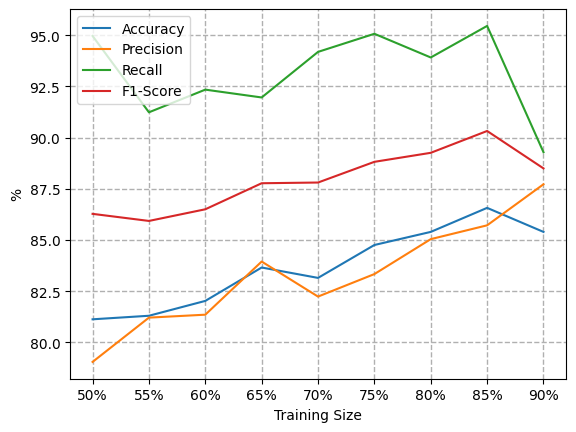

In [48]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , DT_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , DT_matrices['precision'], label="Precision")
plt.plot(training_size , DT_matrices['recall'], label="Recall")
plt.plot(training_size , DT_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

# Evaloution

## 1) ZeroOneLose

In [49]:
from sklearn.metrics import zero_one_loss
#----------------------------------------------------
print('Logistic Regression')
Z_O_L = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', Z_O_L )
#----------------------------------------------------
print('\nKNN')

Z_O_L1 = zero_one_loss(y_test1,y_pred1,normalize=False) 
print('Zero One Loss Value : ', Z_O_L1 )
#----------------------------------------------------
print('\nSVC')

Z_O_L2 = zero_one_loss(y_test2,y_pred2,normalize=False) 
print('Zero One Loss Value : ', Z_O_L2 )
#----------------------------------------------------
print("\nDecision TREE")

Z_O_L3 = zero_one_loss(y_test3,y_pred3,normalize=False)
print('Zero One Loss Value : ', Z_O_L3 )

Logistic Regression
Zero One Loss Value :  17

KNN
Zero One Loss Value :  21

SVC
Zero One Loss Value :  66

Decision TREE
Zero One Loss Value :  13


## 2) ROC & AUC

In [50]:
y_pred_proba    = LRModel.predict_proba(x_test)[::,1]
fpr, tpr, _     = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc             = roc_auc_score(y_test, y_pred_proba)
#-------------------------------------------------------------

y_pred_proba1   = KNNModel.predict_proba(x_test1)[::,1]
fpr1, tpr1, _   = roc_curve(y_test1,  y_pred_proba1, pos_label=1)
auc1            = roc_auc_score(y_test1, y_pred_proba1)

#-------------------------------------------------------------

y_pred_proba2   = SVCModel.predict_proba(x_test2)[::,1]
fpr2, tpr2, _   = roc_curve(y_test2,  y_pred_proba2, pos_label=1)
auc2            = roc_auc_score(y_test2, y_pred_proba2)
                                     
#-------------------------------------------------------------

y_pred_proba3   = DTModel.predict_proba(x_test3)[::,1]
fpr3, tpr3, _   = roc_curve(y_test3,  y_pred_proba3, pos_label=1)
auc3            = roc_auc_score(y_test3, y_pred_proba3)

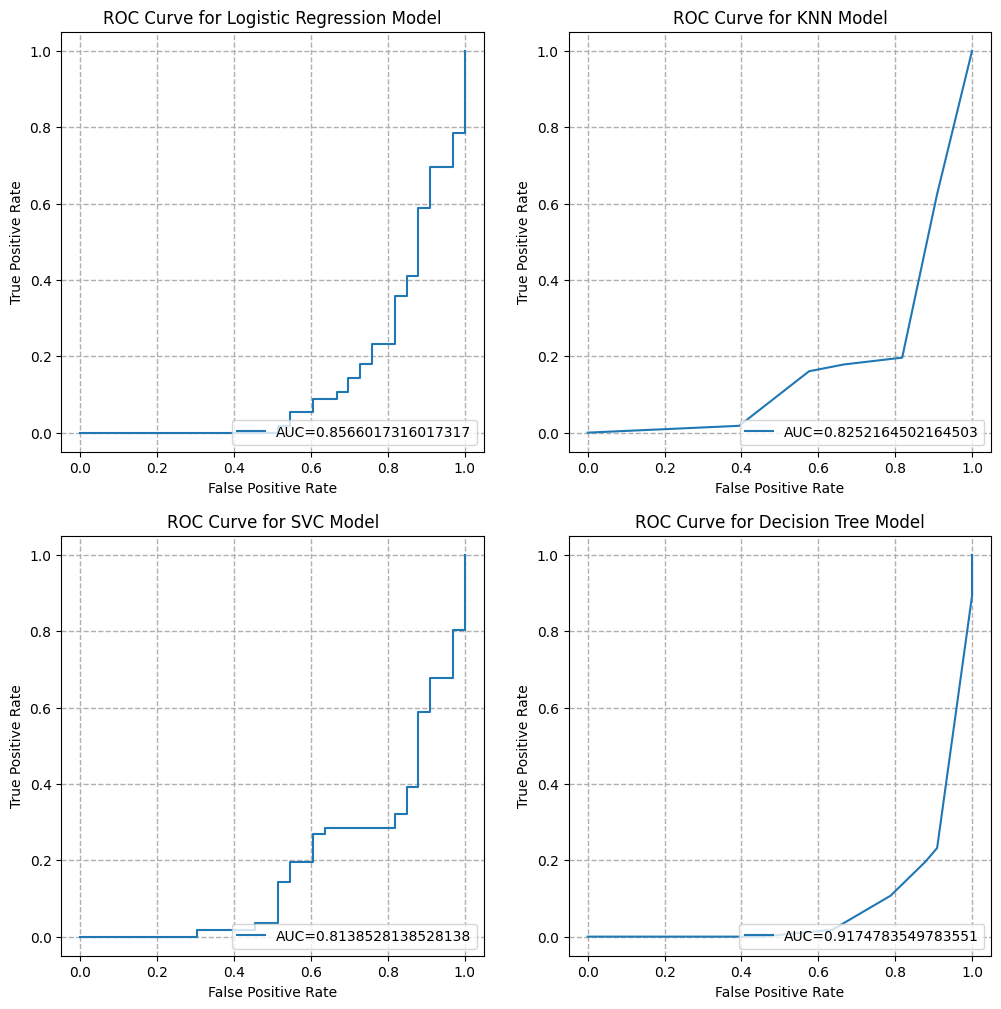

In [51]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.title ('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,2)
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))

plt.title ('ROC Curve for KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,3)
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))

plt.title ('ROC Curve for SVC Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,4)
plt.plot(fpr3,tpr3,label=f"AUC={str(auc3)}")

plt.title ('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.show()

## 3) Confusion Matrix

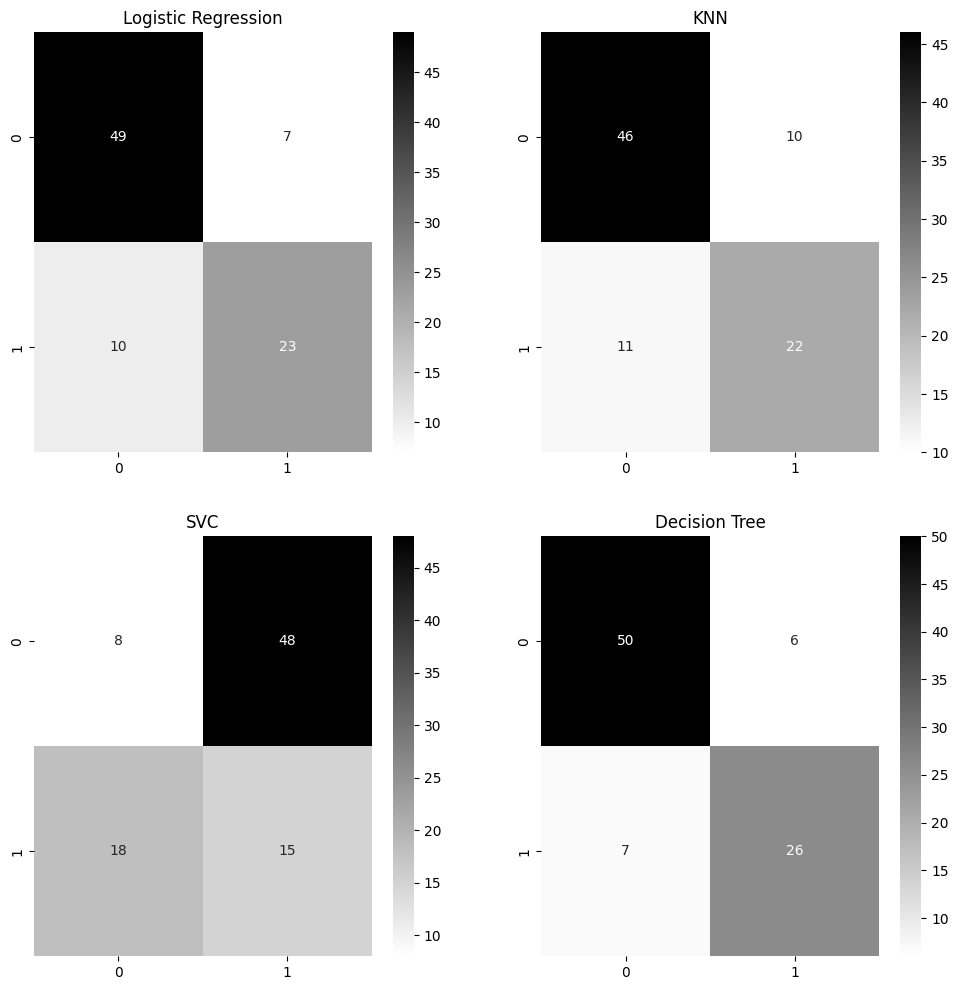

In [52]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
CM = confusion_matrix(y_test,y_pred) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("Logistic Regression")

plt.subplot(2,2,2)

CM = confusion_matrix(y_test1,y_pred1) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("KNN")

plt.subplot(2,2,3)

CM = confusion_matrix(y_test2,y_pred2) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("SVC")

plt.subplot(2,2,4)

CM = confusion_matrix(y_test3,y_pred3) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("Decision Tree")

plt.show()

## 4) Classification Report

In [53]:
#LG
accuracy =accuracy_score(y_test,y_pred) *100
precision=precision_score(y_test,y_pred)*100
recall   =recall_score(y_test,y_pred)   *100
F1_score =f1_score(y_test,y_pred)       *100

print(f"Accuracy {accuracy}\nPrecision {precision}\nRecall {recall}\nF1-Score {F1_score}")

Accuracy 80.89887640449437
Precision 83.05084745762711
Recall 87.5
F1-Score 85.21739130434783


In [54]:
#KNN 
accuracy1 =accuracy_score(y_test1,y_pred1)   *100 
precision1=precision_score(y_test1,y_pred1)  *100
recall1   =recall_score(y_test1,y_pred1)     *100
f1_score1 =f1_score(y_test1,y_pred1)         *100

print(f"Accuracy {accuracy1}\nPrecision {precision1}\nRecall {recall1}\nF1-Score {f1_score1}")

Accuracy 76.40449438202246
Precision 80.7017543859649
Recall 82.14285714285714
F1-Score 81.41592920353982


In [55]:
#SVC
accuracy2 =accuracy_score(y_test2,y_pred2)   *100
precision2=precision_score(y_test2,y_pred2)  *100 
recall2   =recall_score(y_test2,y_pred2)     *100
f1_score2 =f1_score(y_test2,y_pred2)         *100


print(f"Accuracy {accuracy2}\nPrecision {precision2}\nRecall {recall2}\nF1-Score {f1_score2}")

Accuracy 25.842696629213485
Precision 30.76923076923077
Recall 14.285714285714285
F1-Score 19.51219512195122


In [56]:
#DT
accuracy3 =accuracy_score(y_test3,y_pred3)   *100
precision3=precision_score(y_test3,y_pred3)  *100
recall3   =recall_score(y_test3,y_pred3)     *100
f1_score3 =f1_score(y_test3,y_pred3)         *100


print(f"Accuracy {accuracy3}\nPrecision {precision3}\nRecall {recall3}\nF1-Score {f1_score3}")

Accuracy 85.39325842696628
Precision 87.71929824561403
Recall 89.28571428571429
F1-Score 88.49557522123894


# Prediction With Desecion Tree

In [57]:
PredicttData.shape

(418, 7)

In [58]:
PREDICTIONLIST=[]

for x in range (len(PredicttData)):
    INPUT_DATA= PredicttData.iloc[x] #Just Choise The Sampling By iloc[?]
    
    INPUT_DATA_NP  =np.asarray(INPUT_DATA)
    
    INPUT_DATA_NP_RE =INPUT_DATA_NP.reshape(1,-1)
    
    PREDICTION = DTModel.predict(INPUT_DATA_NP_RE)
    PREDICTIONLIST.append(PREDICTION)

**Show The Sample**

In [59]:
INPUT_DATA

Pclass       3.00000
Sex          1.00000
Age         30.27259
SibSp        1.00000
Parch        1.00000
Fare        22.35830
Embarked     0.00000
Name: 417, dtype: float64

**Answer If 1 Mean Not Survived <br> But If 2 Mean Survived**

In [60]:
PREDICTION

array([2.])

In [61]:
if PREDICTION == 1:
    print("Not Survived !!")
elif PREDICTION == 2:
    print("Survived !!")
else: Print("NOWAY")

Survived !!


In [62]:
PredictedOut=[]

for x in PREDICTIONLIST:
    if x == 1:
        PredictedOut.append(0)
    elif x == 2:
        PredictedOut.append(1)
    else :
        PredictedOut.append(2)
        
PredictedOut = pd.Series(PredictedOut, name="Survived")

In [63]:
PredictedOut.shape

(418,)

### Get PssengerId Column

In [64]:
TestData = pd.read_csv('test.csv')

In [65]:
PassengerIdColumn = TestData['PassengerId']

In [66]:
PassengerIdColumn.shape

(418,)

### Concatenate The Passenger Id With The Prediction

In [67]:
OutFile= pd.concat([PassengerIdColumn, PredictedOut], axis=1)

In [68]:
OutFile.shape

(418, 2)

In [69]:
OutFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Save File Of Prediction

In [70]:
# OutFile.to_csv('PredictionFile', sep=',', index=False, encoding='utf-8')

# THANK YOU